In [1]:
# Import libraries

import pandas as pd
import numpy as np

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
# importing librosa after matplotlib otherwise doesn't work 
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio

# parselmouth is a library for analyzing pitch and intensity
import parselmouth

# Scikit learn for data preparation & results visualization
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# TensorFlow for DL modelling
import tensorflow as tf

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint


2023-04-03 07:01:36.022098: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Specify directories

data_dir = '/Users/valkebets/Documents/Work/project-data/learn__DL/build_speech_recognition_model_DL/'

Berlin = data_dir + 'EmoDB/'
Crema = data_dir + 'CREMA-D/'
Ravdess = data_dir + 'RAVDESS/audio_speech_actors_01-24/'
Savee = data_dir + 'SAVEE/'
Tess = data_dir + 'TESS/TESS Toronto emotional speech set data/'

In [3]:
# Organize Berlin EmoDB dataset

berlin_dir_list = os.listdir(Berlin)

file_emotion = []
file_path = []

for file in berlin_dir_list:
    # storing file paths
    file_path.append(Berlin + file)
    # storing file emotions    
    part = file.split('_')[0]
    ele = part[5]
    if ele == 'W':    # Ärger (Wut) -> Angry
        file_emotion.append('angry')
    elif ele == 'L':  # Langeweile -> Boredom
        file_emotion.append('boredom')
    elif ele == 'E':  # Ekel -> Disgusted
        file_emotion.append('disgust')
    elif ele == 'A': # Angst -> Anxiety/Fear
        file_emotion.append('fear')
    elif ele == 'F': # Freude -> Happiness
        file_emotion.append('happy')
    elif ele == 'T': # Trauer -> Sadness
        file_emotion.append('sad')
    elif ele == 'N': # Neutral
        file_emotion.append('neutral')
                
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Berlin_df = pd.concat([emotion_df, path_df], axis=1)

print('Berlin EmoDB Dataset')
print(len(np.unique(Berlin_df.Emotions)), 'emotions:')
print(np.unique(Berlin_df.Emotions))
print(Berlin_df.Emotions.shape[0], 'examples')
Berlin_df.head()        

Berlin EmoDB Dataset
7 emotions:
['angry' 'boredom' 'disgust' 'fear' 'happy' 'neutral' 'sad']
535 examples


,Emotions,Path
0,boredom,/Users/valkebets/Documents/Work/project-data/l...
1,angry,/Users/valkebets/Documents/Work/project-data/l...
2,fear,/Users/valkebets/Documents/Work/project-data/l...
3,disgust,/Users/valkebets/Documents/Work/project-data/l...
4,angry,/Users/valkebets/Documents/Work/project-data/l...


In [4]:
# Organize Ravdess dataset

ravdess_dir_list = os.listdir(Ravdess)

file_emotion = []
file_path = []

for dir in ravdess_dir_list:
    # extract files for each actor
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # extract associated emotion
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 
                             5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},
                            inplace=True)

print('RAVDESS Dataset')
print(len(np.unique(Ravdess_df.Emotions)), 'emotions:')
print(np.unique(Ravdess_df.Emotions))
print(Ravdess_df.Emotions.shape[0], 'examples')
Ravdess_df.head()        

RAVDESS Dataset
8 emotions:
['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
1440 examples


,Emotions,Path
0,angry,/Users/valkebets/Documents/Work/project-data/l...
1,fear,/Users/valkebets/Documents/Work/project-data/l...
2,fear,/Users/valkebets/Documents/Work/project-data/l...
3,angry,/Users/valkebets/Documents/Work/project-data/l...
4,disgust,/Users/valkebets/Documents/Work/project-data/l...


In [5]:
# Organize Crema dataset

crema_dir_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_dir_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions    
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('unknown')
        
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)

print('CREMA Dataset')
print(len(np.unique(Crema_df.Emotions)), 'emotions:')
print(np.unique(Crema_df.Emotions))
print(Crema_df.Emotions.shape[0], 'examples')
Crema_df.head()

CREMA Dataset
6 emotions:
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']
7442 examples


,Emotions,Path
0,angry,/Users/valkebets/Documents/Work/project-data/l...
1,angry,/Users/valkebets/Documents/Work/project-data/l...
2,neutral,/Users/valkebets/Documents/Work/project-data/l...
3,neutral,/Users/valkebets/Documents/Work/project-data/l...
4,disgust,/Users/valkebets/Documents/Work/project-data/l...


In [6]:
# Organize Tess dataset

tess_dir_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_dir_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps': # pleasant surprise
            file_emotion.append('pleasant surprise')
        else:
            file_emotion.append(part)
        # storing file paths
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

print('TESS Dataset')
print(len(np.unique(Tess_df.Emotions)), 'emotions:')
print(np.unique(Tess_df.Emotions))
print(Tess_df.Emotions.shape[0], 'examples')
Tess_df.head()

TESS Dataset
7 emotions:
['angry' 'disgust' 'fear' 'happy' 'neutral' 'pleasant surprise' 'sad']
2800 examples


,Emotions,Path
0,disgust,/Users/valkebets/Documents/Work/project-data/l...
1,disgust,/Users/valkebets/Documents/Work/project-data/l...
2,disgust,/Users/valkebets/Documents/Work/project-data/l...
3,disgust,/Users/valkebets/Documents/Work/project-data/l...
4,disgust,/Users/valkebets/Documents/Work/project-data/l...


In [7]:
# Organize Savee dataset

savee_dir_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_dir_list:
    # storing file paths
    file_path.append(Savee + file)
    # storing file emotions    
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'sa': # sad
        file_emotion.append('sad')
    elif ele == 'a': # angry
        file_emotion.append('angry')
    elif ele == 'd': # disgust
        file_emotion.append('disgust')
    elif ele == 'f': # fear
        file_emotion.append('fear')
    elif ele == 'h': # happy
        file_emotion.append('happy')
    elif ele == 'n': # neutral
        file_emotion.append('neutral')
    elif ele == 'su': # surprise
        file_emotion.append('surprise')
                
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)

print('SAVEE Dataset')
print(len(np.unique(Savee_df.Emotions)), 'emotions:')
print(np.unique(Savee_df.Emotions))
print(Savee_df.Emotions.shape[0], 'examples')
Savee_df.head()        

SAVEE Dataset
7 emotions:
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
480 examples


,Emotions,Path
0,sad,/Users/valkebets/Documents/Work/project-data/l...
1,sad,/Users/valkebets/Documents/Work/project-data/l...
2,neutral,/Users/valkebets/Documents/Work/project-data/l...
3,surprise,/Users/valkebets/Documents/Work/project-data/l...
4,neutral,/Users/valkebets/Documents/Work/project-data/l...


In [8]:
# Create dataframe grouping all datasets

datasets = [Berlin_df, Ravdess_df, Crema_df, Tess_df, Savee_df]

data_path = pd.concat(datasets, axis=0)
print(len(datasets), 'datasets')
print(len(np.unique(data_path.Emotions)), 'unique emotions:', np.unique(data_path.Emotions))
print(data_path.shape[0], 'examples')

5 datasets
10 unique emotions: ['angry' 'boredom' 'calm' 'disgust' 'fear' 'happy' 'neutral'
 'pleasant surprise' 'sad' 'surprise']
12697 examples


In [9]:
# Save for possible use later

fname = data_dir + 'data_path_' + str(len(np.unique(data_path.Emotions))) + 'emotions_' + str(len(datasets)) + 'datasets.csv'
data_path.to_csv(fname, index=False)
data_path.head()

,Emotions,Path
0,boredom,/Users/valkebets/Documents/Work/project-data/l...
1,angry,/Users/valkebets/Documents/Work/project-data/l...
2,fear,/Users/valkebets/Documents/Work/project-data/l...
3,disgust,/Users/valkebets/Documents/Work/project-data/l...
4,angry,/Users/valkebets/Documents/Work/project-data/l...


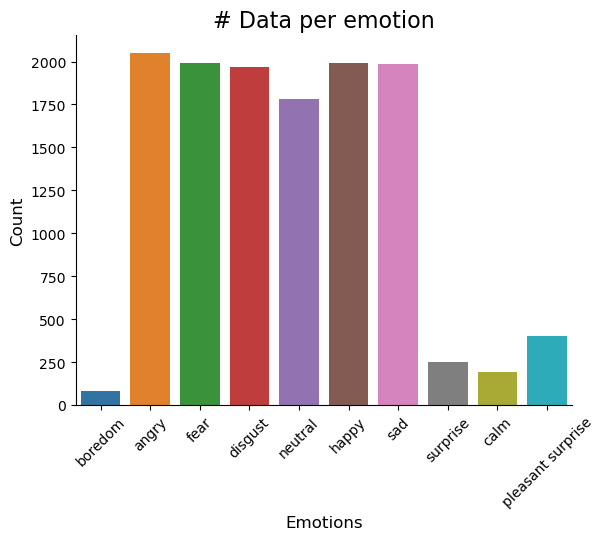

In [10]:
# Visualize #examples per emotion

sns.countplot(x=data_path["Emotions"])
plt.title('# Data per emotion', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

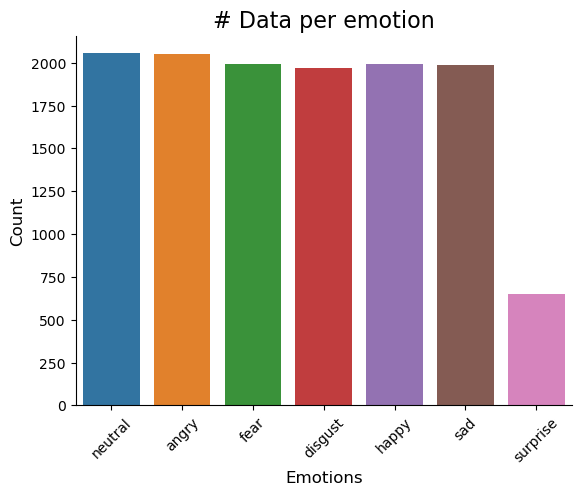

In [11]:
# Summarize into 7 universal emotions

data_path_emo7 = data_path.copy()
data_path_emo7.replace({'boredom':'neutral', 'calm':'neutral', 'pleasant surprise': 'surprise'}, inplace=True)

# Save for possible use later
fname = data_dir + 'data_path_' + str(len(np.unique(data_path_emo7.Emotions))) + 'emotions_' + str(len(datasets)) + 'datasets.csv'
data_path_emo7.to_csv(fname, index=False)

# Visualize #examples per emotion

sns.countplot(x=data_path_emo7["Emotions"])
plt.title('# Data per emotion', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

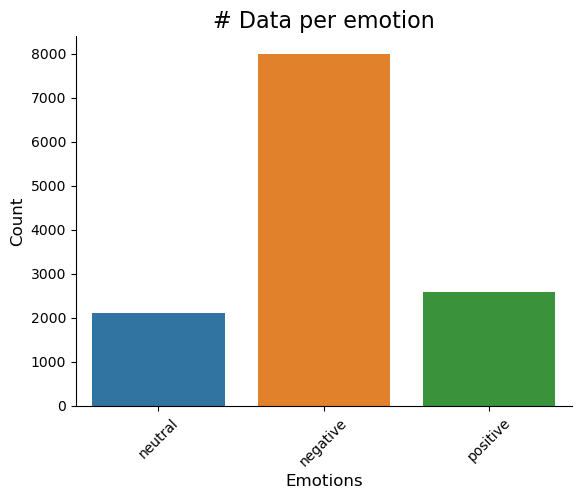

In [12]:
# Summarize into 3 emotions (positive, neutral, negative)

data_path_emo3 = data_path.copy()
data_path_emo3.replace({'boredom':'neutral', 'calm':'positive', 'pleasant surprise': 'positive',
                        'angry':'negative', 'sad':'negative', 'fear':'negative', 'happy':'positive', 
                        'disgust': 'negative', 'surprise':'neutral'}, inplace=True)

# Save for use
fname = data_dir + 'data_path_' + str(len(np.unique(data_path_emo3.Emotions))) + 'emotions_' + str(len(datasets)) + 'datasets.csv'
data_path_emo3.to_csv(fname, index=False)

# Visualize #examples per emotion
sns.countplot(x=data_path_emo3["Emotions"])
plt.title('# Data per emotion', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:
data_path_emo3 = pd.read_csv(data_dir + 'data_path_3emotions_5datasets.csv')
data_path_emo3.head()

,Emotions,Path
0,neutral,/Users/valkebets/Documents/Work/project-data/l...
1,negative,/Users/valkebets/Documents/Work/project-data/l...
2,negative,/Users/valkebets/Documents/Work/project-data/l...
3,negative,/Users/valkebets/Documents/Work/project-data/l...
4,negative,/Users/valkebets/Documents/Work/project-data/l...


# Signal processing

An audio signal is comprised of several single-frequency sound waves. When taking samples of the signal over time, we only capture the resulting amplitudes. The Fourier transform allows us to decompose a signal into its individual frequencies and the frequency’s amplitude. In other words, it converts the signal from the time domain into the frequency domain. The result is called a spectrum.

We use fast Fourier transform to compute spectrogram, and then convert signals to Mel units.

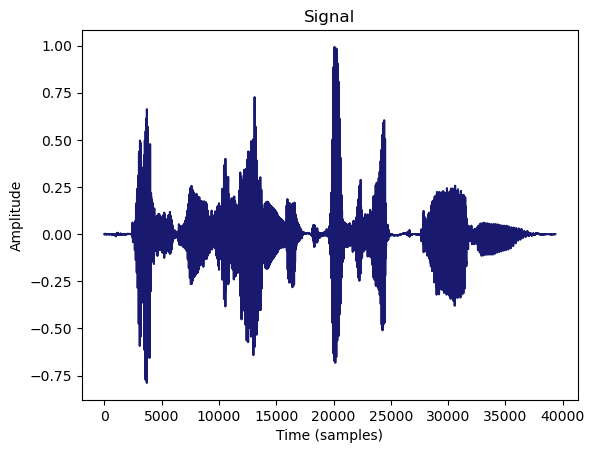

In [14]:
# Visualize signal waveform

emotion = 'positive'
path = np.array(data_path_emo3.Path[data_path_emo3.Emotions==emotion])[1]

data, sampling_rate = librosa.load(path)
plt.plot(data, color='midnightblue')
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [15]:
# Create waveloplot (loudness) and spectrogram (frequencies spectrum) for audio signals

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10,3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    #plt.savefig(data_dir + 'waveplot_' + e + '.png', facecolor='white', bbox_inches='tight')
    
def create_spectrogram(data, sr, e):
    # short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12,3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

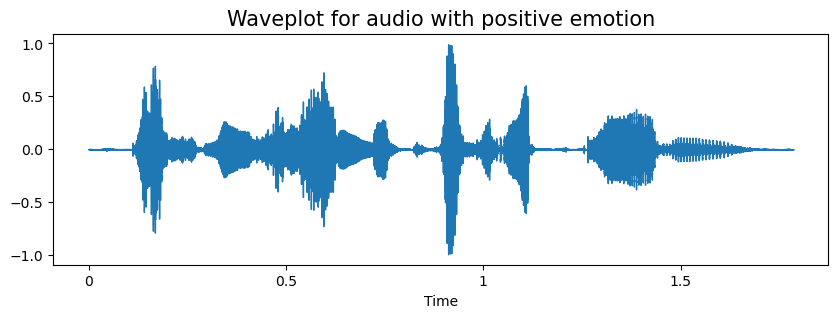

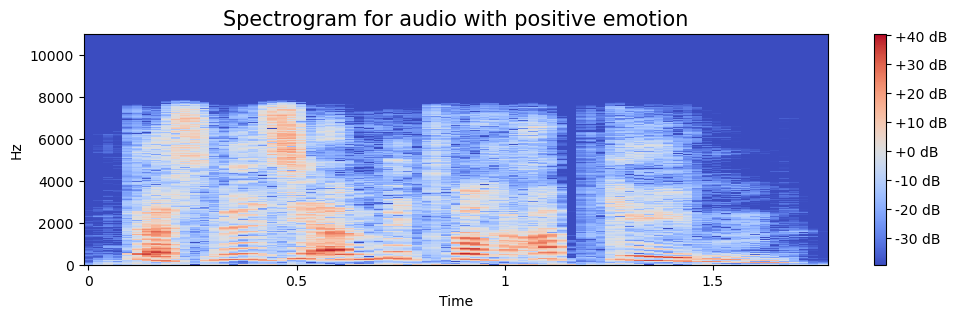

In [16]:
emotion = 'positive'
path = np.array(data_path_emo3.Path[data_path_emo3.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

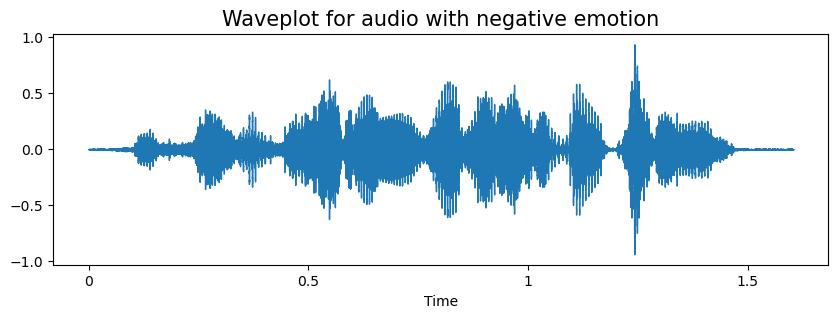

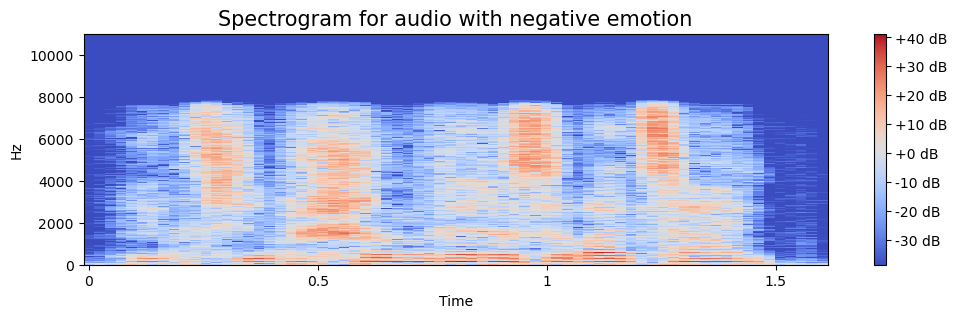

In [17]:
emotion = 'negative' 
path = np.array(data_path_emo3.Path[data_path_emo3.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

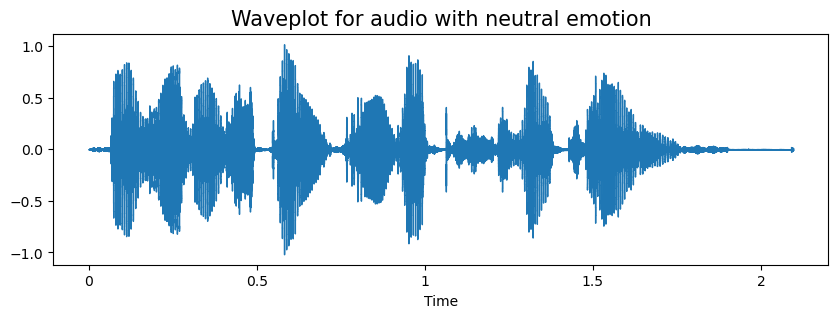

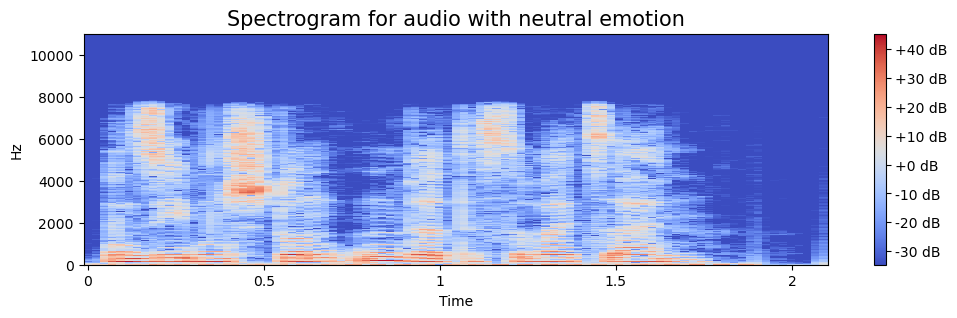

In [19]:
emotion = 'neutral'
path = np.array(data_path_emo3.Path[data_path_emo3.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data augmentation

In [20]:
# Data augmentation

def noise(data):
    noise_amp = 0.035*np.random.uniform()+np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)  

# check
path = np.array(data_path_emo3.Path)[1]
data, sample_rate = librosa.load(path)

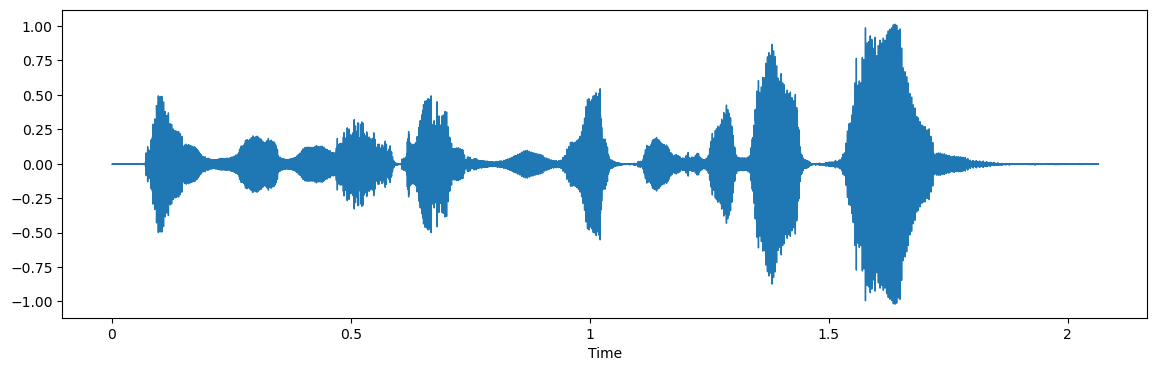

In [21]:
# Simple audio

plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

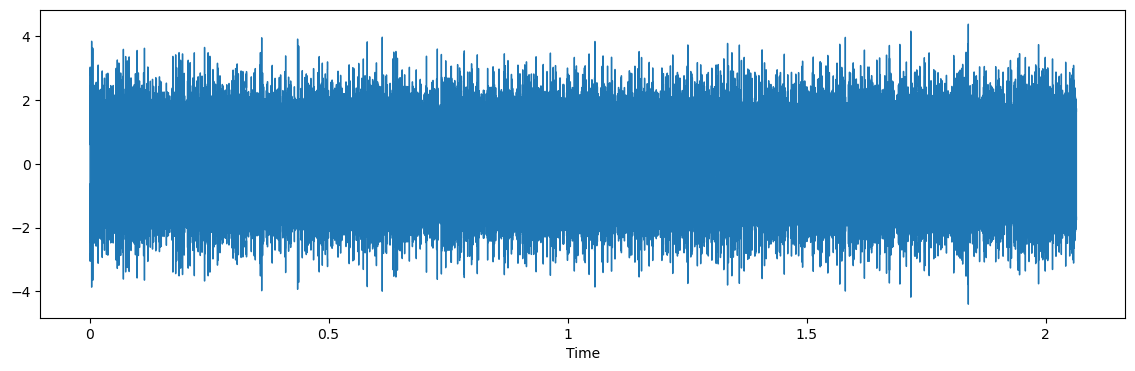

In [22]:
# Noise injection

x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

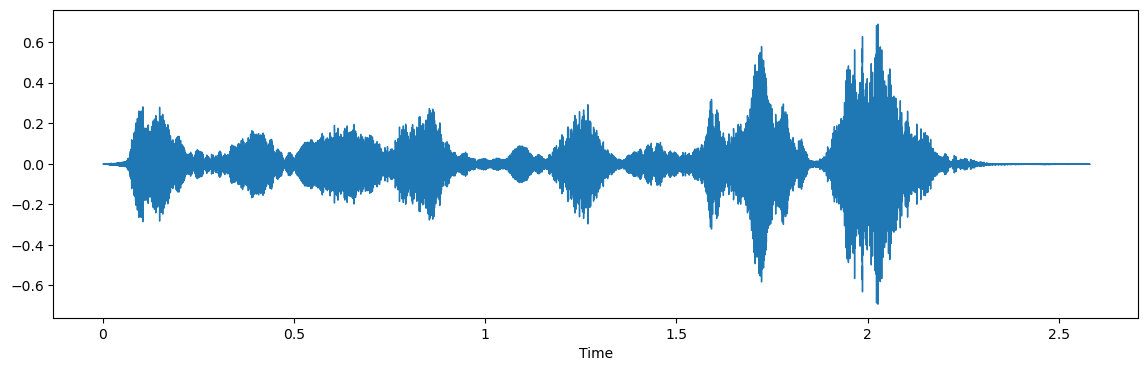

In [23]:
# Stretching (changing speed)

x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

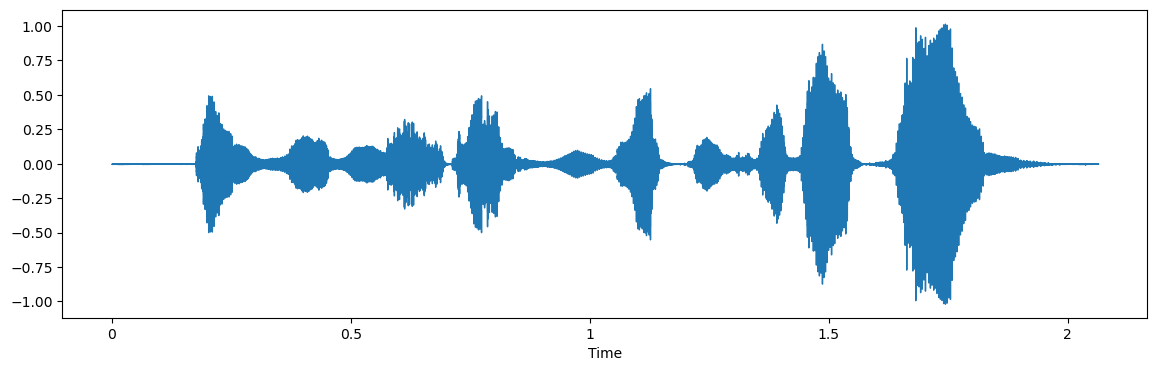

In [24]:
# Shifting

x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

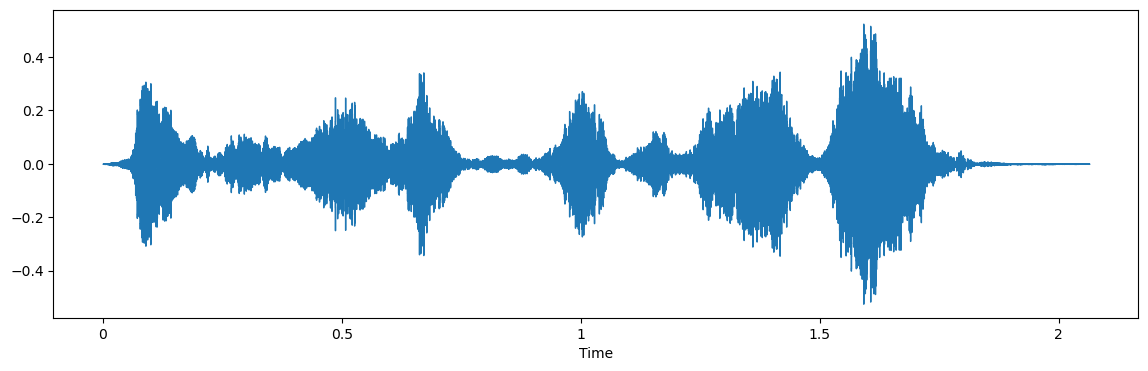

In [25]:
# Pitching

x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Feature extraction 

We extract **spectral & prosodic** features.

Linguistic features could be considered in the future (see SpeechRecognition & NLTK packages), though datasets would have to be in English (which isn't the case now). 

Note: Mels are a unit of pitch such that equal distances in pitch sounded equally distant to the listener.

In [26]:
def extract_features(data):
    # extracting mean of each feature, but could be changed to min, max, etc.

    result = np.array([])

    # SPECTRAL FEATURES

    # Zero-crossing rate (the rate at which a signal changes from positive to zero to negative or from negative to zero to positive) 
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft (computes a chromagram from a waveform or power spectrogram)
    stft = np.abs(librosa.stft(data)) # short-time Fourier transform
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC (Mel-frequency cepstral coefficients)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram (computes a Mel-scaled spectrogram)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally    
        
    # PROSODIC FEATURES    
    
    sound = parselmouth.Sound(data)
    pitch = sound.to_pitch()
    intensity = sound.to_intensity()

    # pitch
    pitch_mean = np.mean(pitch.selected_array['frequency'])
    result = np.hstack((result, pitch_mean)) # stacking horizontally  

    # intensity
    intensity_mean = intensity.get_average()
    result = np.hstack((result, intensity_mean)) # stacking horizontally  
    
    
    return result

def get_features(path):

    #data, sample_rate = librosa.load(path) # some files are short, so not using duration & offset
    #duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result


In [27]:
# Define X as features (data, noise_data, data_stretched_pitched)
# Define Y as labels (emotions)

X, Y = [], []
for path, emotion in zip(data_path_emo3.Path, data_path_emo3.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/Users/valkebets/opt/miniconda3/envs/py39/lib/python3.9/site-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
# Store X and Y in dataframe
#Features = pd.DataFrame(X)
#Features['labels'] = Y
#Features.to_csv(data_dir + 'spectral_prosodic_features_3emotions_5datasets.csv', index=False)
#Features.head()

In [ ]:
Features = pd.read_csv(data_dir + 'features_3emotions_5datasets.csv')
print(Features.shape)

# Data preparation

We split the data into train and test sets using a stratified split (i.e., preserving the % of samples for each class)

In [91]:
# Data preparation

X = Features.iloc[:, :-1].values
Y = Features['labels'].values

In [92]:
print(X.shape, Y.shape)

(38091, 164) (38091,)


In [93]:
# Splitting data into train and test sets 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, Y):
    x_train = X[train_index]
    y_train = Y[train_index]
    x_test = X[test_index]
    y_test = Y[test_index]    

print('Train set dimensions (features/labels):', x_train.shape, '/', y_train.shape)
print('Test set dimensions (features/labels):', x_test.shape, '/', y_test.shape)

Train set dimensions (features/labels): (30472, 164) / (30472,)
Test set dimensions (features/labels): (7619, 164) / (7619,)


In [94]:
# Transforming non numerical labels into numerical labels
encoder = LabelEncoder()

# Encoding train labels 
encoder.fit(y_train)
y_train = encoder.transform(y_train)

# Encoding test labels 
encoder.fit(y_test)
y_test = encoder.transform(y_test)

In [95]:
# Normalization (z-scoring)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Classification using classic ML

We first start with SVM and Random Forest classifers to get a first benchmark. 

In [29]:
# Display results

def create_confusion_matrix(y_test, y_pred, classes):
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (12, 10))
    cm = pd.DataFrame(cm , index = [i for i in classes] , columns = [i for i in classes])
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
    plt.title('Confusion Matrix', size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)
    plt.show()

In [12]:
# Multiclass SVM

svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
# Ideally we would also do hyperparameter tuning using parameter grid search and cross validation

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(x_train, y_train)

# Display best hyperparameters & apply to test data

print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_svm_model = svm_model.best_estimator_

In [14]:
# Predicting test set labels
y_pred_svm = svm_model.predict(x_test)

# Recode numerical labels as emotions
y_pred_svm_labels = list(encoder.inverse_transform(y_pred_svm))
y_test_labels = encoder.inverse_transform(y_test)

/var/folders/jz/wlcq2f0x6kb3s9glbsw36kgr0000gn/T/ipykernel_41684/1431454820.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


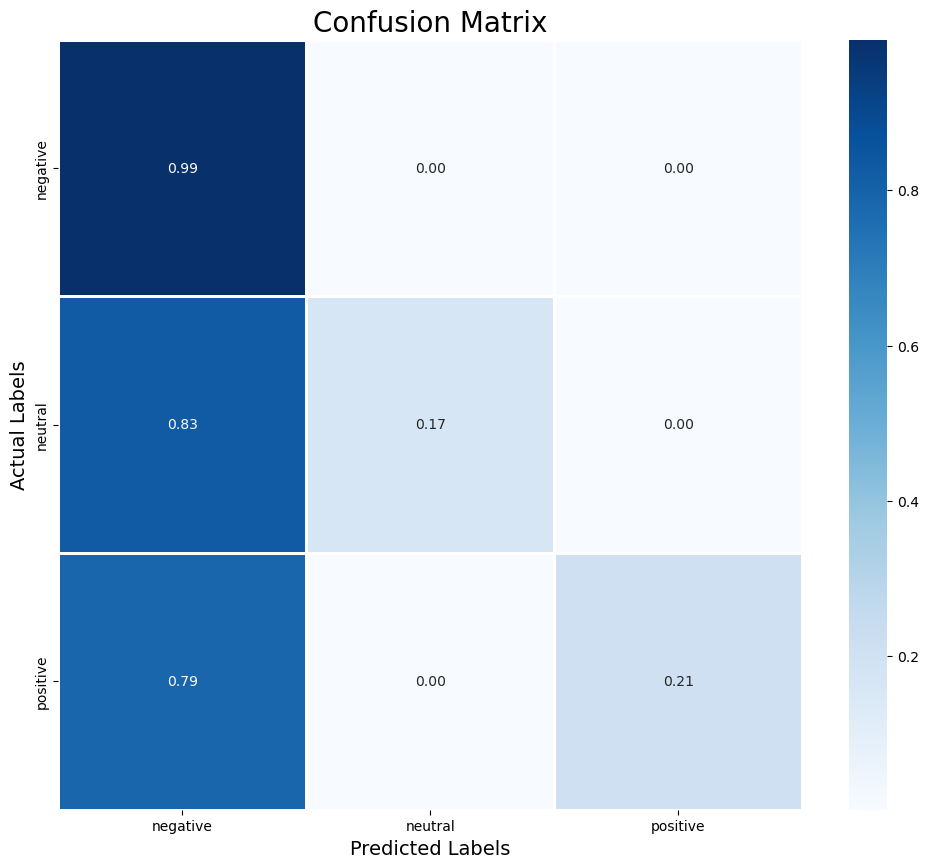

              precision    recall  f1-score   support

    negative       0.68      0.99      0.81      4798
     neutral       0.91      0.17      0.28      1269
    positive       0.95      0.21      0.34      1552

    accuracy                           0.70      7619
   macro avg       0.85      0.46      0.48      7619
weighted avg       0.77      0.70      0.62      7619



In [45]:
# Display accuracy & confusion matrix

create_confusion_matrix(y_test, y_pred_svm, encoder.classes_)
print(classification_report(y_test_labels, y_pred_svm_labels))

In [34]:
# Save model and weights

import pickle

svm_path = data_dir + 'emOtions3_SVM.pkl'

with open(svm_path, 'wb') as fid:
    pickle.dump(svm_model, fid)

print('Save SVM model and weights at', svm_path)

Save SVM model and weights at /Users/valkebets/Documents/Work/project-data/learn__DL/build_speech_recognition_model_DL/emOtions3_SVM.pkl


In [35]:
# Random Forest classifier

rf_model = RandomForestClassifier()

# Fit the grid search model
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Ideally we would also do hyperparameter tuning using parameter grid search and cross validation

# Create the parameter grid based on the results of random search 
rf_param_grid = {
    'bootstrap': [True],                  # Method of selecting samples for training each tree
    'max_depth': [80, 90, 100, 110],      # Maximum number of levels in tree
    'max_features': [2, 3],               # Number of features to consider at every split
    'min_samples_leaf': [3, 4, 5],        # Minimum number of samples required at each leaf node
    'min_samples_split': [8, 10, 12],     # Minimum number of samples required to split a node
    'n_estimators': [100, 200, 300, 1000] # Number of trees in random forest
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
rf_model = GridSearchCV(estimator = rf, param_grid = rf_param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search model
rf_model.fit(x_train, y_train)

# View the best parameters for the model found using grid search

print('Best hyperparameters for RF classifer:', rf_model.best_params_)

final_rf_model = rf_model.best_estimator_
accuracy = evaluate(final_rf_model, x_test, y_test)

In [37]:
# Predicting test set labels

#y_pred_rf = final_rf_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_labels = list(encoder.inverse_transform(y_pred_rf))
#y_test_labels = encoder.inverse_transform(y_test)

/var/folders/jz/wlcq2f0x6kb3s9glbsw36kgr0000gn/T/ipykernel_41684/1431454820.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


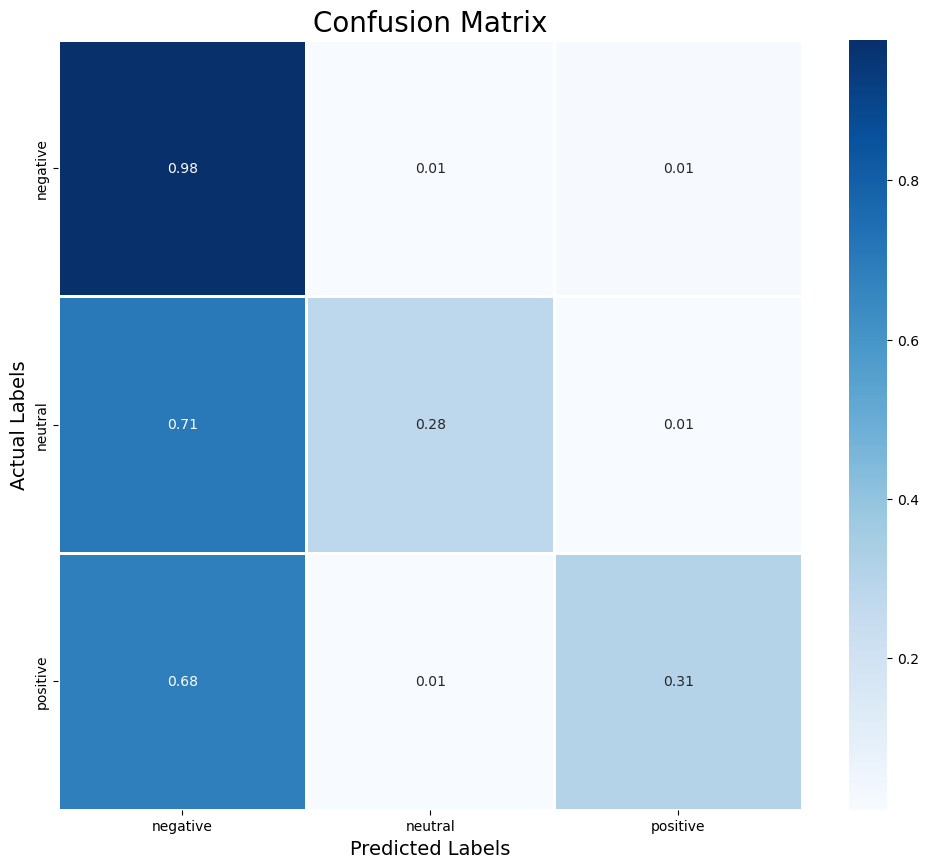

              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      4798
     neutral       0.86      0.28      0.42      1269
    positive       0.85      0.31      0.45      1552

    accuracy                           0.72      7619
   macro avg       0.80      0.52      0.56      7619
weighted avg       0.76      0.72      0.68      7619



In [46]:
# Display accuracy & confusion matrix

from sklearn.metrics import accuracy_score

create_confusion_matrix(y_test_labels, y_pred_rf_labels, encoder.classes_)
print(classification_report(y_test_labels, y_pred_rf_labels))

In [47]:
# Save model and weights

rf_path = data_dir + 'emOtions3_RF.pkl'

with open(rf_path, 'wb') as fid:
    pickle.dump(rf_model, fid)

print('Save RF model and weights at', rf_path)

Save RF model and weights at /Users/valkebets/Documents/Work/project-data/learn__DL/build_speech_recognition_model_DL/emOtions3_RF.pkl


# Classification using DL models

Next, we will try a few DL models:
* CNN
* RNN

In [86]:
# Data preparation

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [87]:
# Splitting data into train and test sets 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, Y):
    x_train = X[train_index]
    y_train = Y[train_index]
    x_test = X[test_index]
    y_test = Y[test_index]    

print('Train set dimensions (features/labels):', x_train.shape, '/', y_train.shape)
print('Test set dimensions (features/labels):', x_test.shape, '/', y_test.shape)

Train set dimensions (features/labels): (30472, 164) / (30472, 3)
Test set dimensions (features/labels): (7619, 164) / (7619, 3)


In [88]:
# Normalization (z-scoring)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(30472, 164) (30472, 3) (7619, 164) (7619, 3)


In [89]:
# Make data compatible for model

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(30472, 164, 1) (30472, 3) (7619, 164, 1) (7619, 3)


In [54]:
# Using CNN with 6 layers
# Regularization: Max pooling & Drop out
# Optimizer: Adam (RMSprop + momentum)

cnn_model = Sequential()
cnn_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

cnn_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')) 
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

cnn_model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu')) 
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Dropout(0.2))
          
cnn_model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu')) 
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(units=3, activation='softmax')) # classification layer
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()                                                                                                                                                                                           

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 164, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 82, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 82, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 21, 128)         

In [30]:
#plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
#Image(retina=True, filename='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [55]:
# Reduce learning rate (alpha) when loss stops improving

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = cnn_model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
477/477 [==============================] - 116s 237ms/step - loss: 0.8753 - accuracy: 0.6388 - val_loss: 0.8111 - val_accuracy: 0.6493 - lr: 0.0010
Epoch 2/50
477/477 [==============================] - 108s 226ms/step - loss: 0.7916 - accuracy: 0.6631 - val_loss: 0.7430 - val_accuracy: 0.6839 - lr: 0.0010
Epoch 3/50
477/477 [==============================] - 101s 212ms/step - loss: 0.7471 - accuracy: 0.6814 - val_loss: 0.7316 - val_accuracy: 0.6805 - lr: 0.0010
Epoch 4/50
477/477 [==============================] - 101s 211ms/step - loss: 0.7222 - accuracy: 0.6877 - val_loss: 0.7108 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 5/50
477/477 [==============================] - 101s 212ms/step - loss: 0.7052 - accuracy: 0.6933 - val_loss: 0.6912 - val_accuracy: 0.6975 - lr: 0.0010
Epoch 6/50
477/477 [==============================] - 102s 213ms/step - loss: 0.6911 - accuracy: 0.7005 - val_loss: 0.6987 - val_accuracy: 0.7005 - lr: 0.0010
Epoch 7/50
477/477 [==========================

239/239 [==============================] - 6s 24ms/step - loss: 0.6880 - accuracy: 0.7301
Accuracy of our model on test data: 73.01483154296875 %


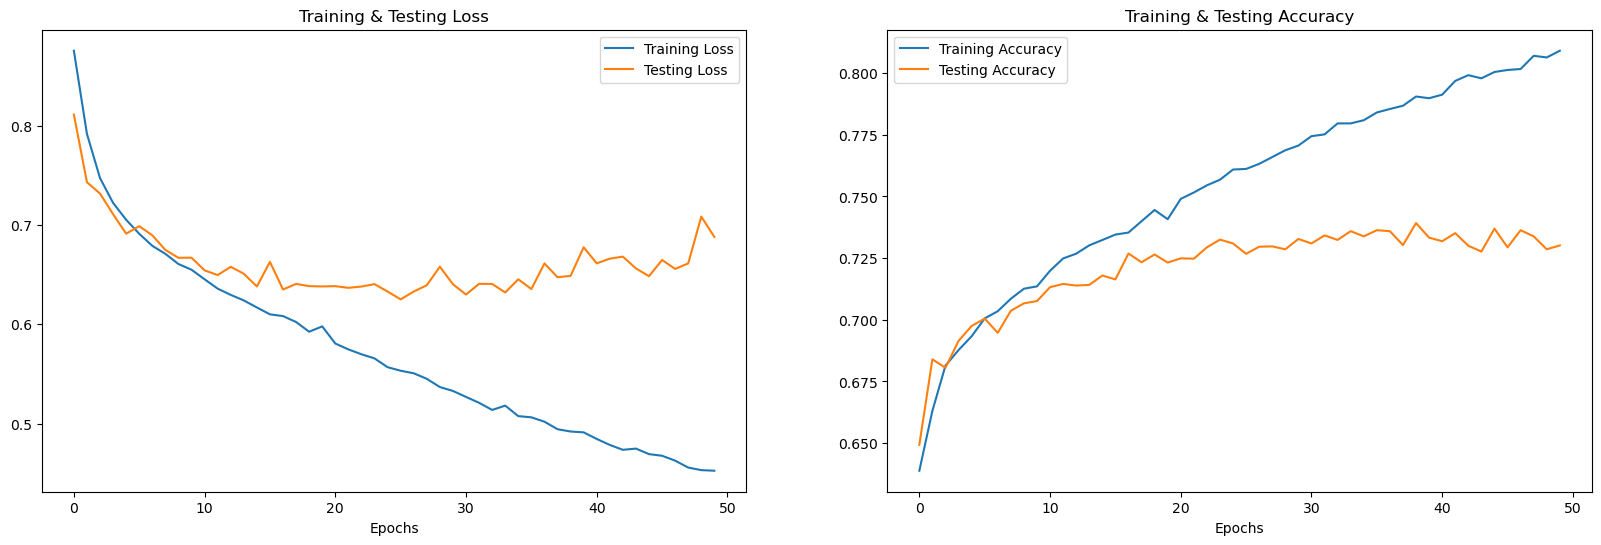

In [56]:
# Display results

print('Accuracy of our model on test data:', cnn_model.evaluate(x_test, y_test)[1]*100, '%')

epochs = [i for i in range(50)]
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

239/239 [==============================] - 7s 28ms/step


/var/folders/jz/wlcq2f0x6kb3s9glbsw36kgr0000gn/T/ipykernel_41684/1431454820.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


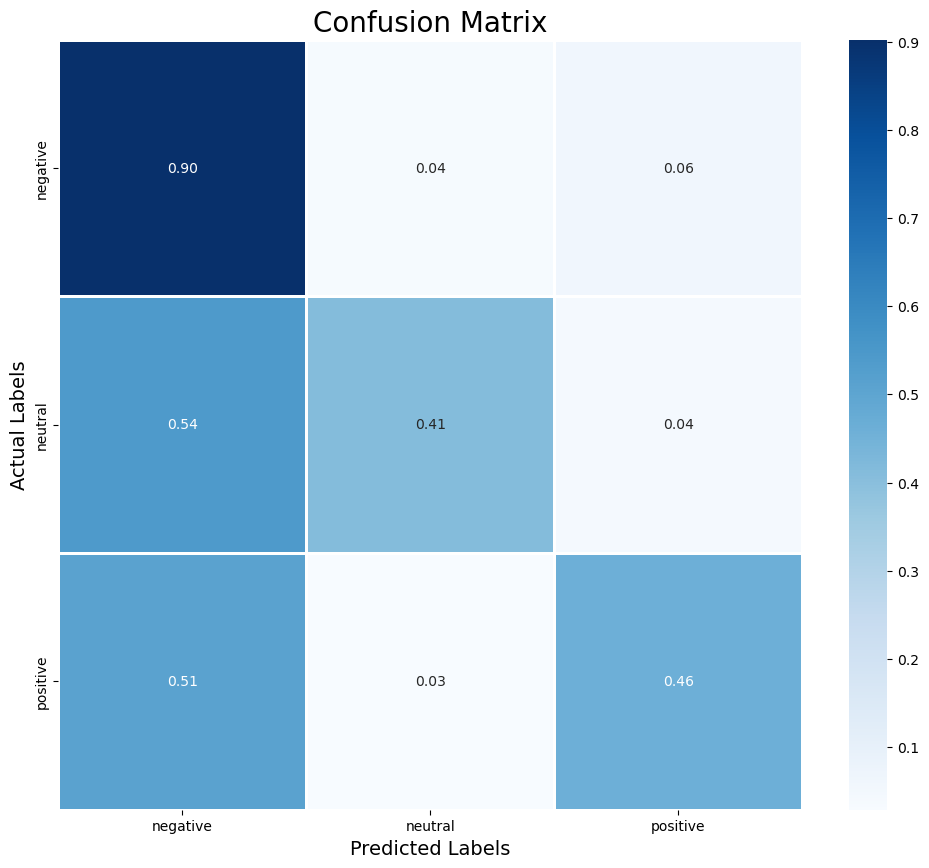

              precision    recall  f1-score   support

    negative       0.74      0.90      0.82      4798
     neutral       0.70      0.41      0.52      1269
    positive       0.67      0.46      0.54      1552

    accuracy                           0.73      7619
   macro avg       0.71      0.59      0.63      7619
weighted avg       0.72      0.73      0.71      7619



In [59]:
# Predict on test data
y_pred_cnn = cnn_model.predict(x_test)
y_pred_cnn_labels = encoder.inverse_transform(y_pred_cnn)
y_test_labels = encoder.inverse_transform(y_test)

# Display accuracy & confusion matrix
create_confusion_matrix(y_test_labels, y_pred_cnn_labels, encoder.categories_)
print(classification_report(y_test_labels, y_pred_cnn_labels))

In [60]:
# Save model and weights

cnn_path = data_dir + 'emOtions3_CNN.pkl'

with open(cnn_path, 'wb') as fid:
    pickle.dump(cnn_model, fid)

print('Save CNN model and weights at', cnn_path)

Save CNN model and weights at /Users/valkebets/Documents/Work/project-data/learn__DL/build_speech_recognition_model_DL/emOtions3_CNN.pkl
